# NLP with Python Workshop

## YK Lee 
### 2019.07.04 Thur

참고: 

Stanford NLP: https://nlp.stanford.edu/ <br>
Text Mining : https://ko.coursera.org/learn/text-mining

그 외 링크 별도 기재 


# I. 소개

# 0. 텍스트 분석의 단계 

#### (1) Data Collection => (2)Text Normalization => (3) Weight => (4) Transform => (5) Classification/Cluster

#### (1) Data Collection에는 manual, web scraping 등이 포함

#### (2) Text Normalization은 다음 단계로 나뉜다. 

    Tokenization => Stopwords Removal => Stemmization/Lemmatization => Pos-Tagging => Key-word Extraction

#### (3) Weight에는 Frequency, Term weight의 계산이 있다. 

#### (4) Transform 에는 SVD, 등의 주어진 키워드에 근거하여 문서들을 할당하는 분류기법이 있다 (Decision Tree, NN, Bayes, PCA, SVM, LSI, LDA..etc.)

#### (5) Classification/Clustering에는 사전 정보 없이 비슷한 문서를 집단으로 묶는 K-means 같은 군집 기법이 있다. 

이번 시간에는 이후 모델링 단계로 가기 전단계인 텍스트 전처리에 대해 알아보자. 텍스트 전처리가 모든 텍스트 분석 과정의 80%를 차지할 만큼 중요하면서도 가장 시간이 많이 소요되는 단계이다.

# 1. 텍스트 단위

텍스트 단위로는 주로 문자 (글자), 단어, 문장 단위가 있다. 

이 중, 단어가 의미를 담고 있을 확률이 가장 많기 때문에 텍스트 분석에서 가장 많이 쓰이는 단위이며 기계 학습 모델도 단어 기반으로 많이 개발되고 있다. 

여기서 '단어'에 해당하는 용어는 아래와 같이 나뉠 수 있다. 

   **word**: 구분된 문자열 <br>
   **term**: normalized된 단어 (대소문자 통일, 형태 복원, 철자 교정 등), word와 동일하게 쓰이기도 한다. <br>
   **token**: 유용한 의미적 단위로 함게 모여지는 일련의 문자열, 구분 기호 (띄어쓰기 등) 사이의 글자 시퀀스. 텍스트 분석의 최소 단위 <br>

# 2. 토큰화(Tokenization)

**토큰** (Token) 은 띄어쓰기 등의 구문 기호로 구분되는 문자열의 최소 단위이다. 의미를 담고 있는 단어일 수도 있고 아닐 수도 있다. 의미를 담고있느냐 아니냐의 여부와는 상관없이 하나의 단어 조각이라고 생각하면 된다. 

**토큰화**(Tokenization)는 문헌 단위의 문자열이 주어졌을때, 토큰으로 쪼개는 방법 또는 그 과정을 일컫는다. 키워드 추출시 분석에 불필요한 작업을 일컬으기도 하나 이는 보통 불용어 처리라고 분류하기도 한다. 

영어의 경우 단어에 조사가 붙지 않기때문에 한글보다 토큰화가 더 잘되는 편이다. 

예시. 2.1.1. 영어 토큰화

"Hello, my name is Yoon" => "Hello"/","/"my"/"name"/"is"/"Yoon"

예시 2.1.2. 한국어 토큰화

"안녕, 내 이름은 윤이야" => "안녕"/","/"내"/"이름"/"은"/"윤"/"이"/"야"



#### 2.1.  토큰화1 : split() with python basic libraries

‘Women’s Rights Are Human Rights’ by Hillary Clinton(1995)

In [3]:
hc = """If there is one message that echoes forth from this conference, let it be that human rights are women’s rights and women’s rights are human rights once and for all. Let us not forget that among those rights are the right to speak freely — and the right to be heard."""

In [4]:
hc 

'If there is one message that echoes forth from this conference, let it be that human rights are women’s rights and women’s rights are human rights once and for all. Let us not forget that among those rights are the right to speak freely — and the right to be heard.'

In [6]:
hc_tokens = hc.split(" ")

In [7]:
hc_tokens

['If',
 'there',
 'is',
 'one',
 'message',
 'that',
 'echoes',
 'forth',
 'from',
 'this',
 'conference,',
 'let',
 'it',
 'be',
 'that',
 'human',
 'rights',
 'are',
 'women’s',
 'rights',
 'and',
 'women’s',
 'rights',
 'are',
 'human',
 'rights',
 'once',
 'and',
 'for',
 'all.',
 'Let',
 'us',
 'not',
 'forget',
 'that',
 'among',
 'those',
 'rights',
 'are',
 'the',
 'right',
 'to',
 'speak',
 'freely',
 '—',
 'and',
 'the',
 'right',
 'to',
 'be',
 'heard.']

#### 2.2. 토큰화2 : import nltk

nltk 라이브러리에는 토큰화를 포함하여 기본적인 전처리에 필요한 다른 함수들도 제공한다. 먼저 토큰화를 위한 라이브러리를 살펴보자. 

토큰화할 문구는 마찬가지로 위 2.1번에서 했던 hilary clinton의 연설문이다. 

In [8]:
print(hc) #check again, just in case.. 

If there is one message that echoes forth from this conference, let it be that human rights are women’s rights and women’s rights are human rights once and for all. Let us not forget that among those rights are the right to speak freely — and the right to be heard.


In [9]:
import nltk 
from nltk.tokenize import word_tokenize 

nltk에서 제공하는 토큰화 함수는 word_tokenize이다. 

In [10]:
tokens = nltk.word_tokenize(hc)

In [11]:
tokens

['If',
 'there',
 'is',
 'one',
 'message',
 'that',
 'echoes',
 'forth',
 'from',
 'this',
 'conference',
 ',',
 'let',
 'it',
 'be',
 'that',
 'human',
 'rights',
 'are',
 'women',
 '’',
 's',
 'rights',
 'and',
 'women',
 '’',
 's',
 'rights',
 'are',
 'human',
 'rights',
 'once',
 'and',
 'for',
 'all',
 '.',
 'Let',
 'us',
 'not',
 'forget',
 'that',
 'among',
 'those',
 'rights',
 'are',
 'the',
 'right',
 'to',
 'speak',
 'freely',
 '—',
 'and',
 'the',
 'right',
 'to',
 'be',
 'heard',
 '.']

nltk의 ```WordPunctTokenizer```는 구두점도 따로 분리해준다. 

Bases: ``` nltk.tokenize.regexp.RegexpTokenizer ```

Tokenize a text into a sequence of alphabetic and non-alphabetic characters, using the regexp \w+|[^\w\s]+.

In [12]:
from nltk.tokenize import WordPunctTokenizer

In [13]:
punct = nltk.WordPunctTokenizer()

In [33]:
s = """
Good muffins cost $3.88\nin New York.  Please buy me\ntwo of them.\n\nThanks."""

In [34]:
print(s)


Good muffins cost $3.88
in New York.  Please buy me
two of them.

Thanks.


In [35]:
punct.tokenize(s)

['Good',
 'muffins',
 'cost',
 '$',
 '3',
 '.',
 '88',
 'in',
 'New',
 'York',
 '.',
 'Please',
 'buy',
 'me',
 'two',
 'of',
 'them',
 '.',
 'Thanks',
 '.']

Tweet용 토크나이저 ```TweetTokenizer```도 있다. 

In [15]:
from nltk.tokenize import TweetTokenizer

In [16]:
tknzr = TweetTokenizer()

In [17]:
s0 = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"

In [18]:
tknzr.tokenize(s0)

['This',
 'is',
 'a',
 'cooool',
 '#dummysmiley',
 ':',
 ':-)',
 ':-P',
 '<3',
 'and',
 'some',
 'arrows',
 '<',
 '>',
 '->',
 '<--']

# 3. 불용어 처리

실제 문장을 이해할 때 굳이 필요 없는 정보 (구두점, 주어, 문장 부호 등)이거나, 도메인에 따라 중요도가 낮아지는 단어들을 뜻한다. 

영어의 대표적인 불용어는 ``` the, a, um, you, omg, oh, literally, I .. etc. ``` 등이 있다. 

한국어의 대표적인 불용어는 ``` 없, 있, 그, 저, 이 좀, 한.. ``` 등이 있다. 

-- 주의 

하나의 단어, 인용구, 신조어일 경우, 토큰화를 띄어쓰기 단위로만 끊으면 다소 문제가 될 수 있다.  

1)  등과 같이 값, 가치를 표현하는 텍스트가 있을 경우: ``` ' . , ``` 등의 구둣점, 쉼표가 필요할 경우이다. 
    
    $24.95, 1,000,000.00 
    
    
2) 이름/고유명칭

"John Smith" => "John"/"Smith"/ 이름이 John이고 성이 Smith => John과 Smith ?

3) 축약 

"It's fine." => "It is fine" "I'm Korean" => "I am Korean"

별도의 단어 사전을 통해 필터링해두거나 규칙을 정한 후 (예: I'm => I am) 분리 또는 결합 등을 통해 추가 전처리가 필요함.

### 3.1. nltk로 불용어 제거 

nltk의 ```stopwords()```함수 

In [36]:
from nltk.corpus import stopwords

In [37]:
#영어 기본 불용어 (기본 제공)
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
#import nltk
#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

hc_tokens = word_tokenize(hc)

hc_filter = [word for word in hc_tokens if word not in stop_words]

print("First, tokeinze: \n",hc_tokens)

print(" ------ ")

print("Next, remove stopwords: \n",hc_filter)

First, tokeinze: 
 ['If', 'there', 'is', 'one', 'message', 'that', 'echoes', 'forth', 'from', 'this', 'conference', ',', 'let', 'it', 'be', 'that', 'human', 'rights', 'are', 'women', '’', 's', 'rights', 'and', 'women', '’', 's', 'rights', 'are', 'human', 'rights', 'once', 'and', 'for', 'all', '.', 'Let', 'us', 'not', 'forget', 'that', 'among', 'those', 'rights', 'are', 'the', 'right', 'to', 'speak', 'freely', '—', 'and', 'the', 'right', 'to', 'be', 'heard', '.']
 ------ 
Next, remove stopwords: 
 ['If', 'one', 'message', 'echoes', 'forth', 'conference', ',', 'let', 'human', 'rights', 'women', '’', 'rights', 'women', '’', 'rights', 'human', 'rights', '.', 'Let', 'us', 'forget', 'among', 'rights', 'right', 'speak', 'freely', '—', 'right', 'heard', '.']


In [42]:
len(hc_tokens)<len(hc_filter)

False

### 3.2. 불용어 업데이트

In [43]:
stop_words.update(".", "-", "s",", ", "us","the","not")

In [48]:
hc_filter_update = [word for word in hc_tokens if word not in stop_words]
print("This is the original version:\n \n", hc_tokens)
print("\n\nThis is the updated version:\n \n", hc_filter_update)

This is the original version:
 
 ['If', 'there', 'is', 'one', 'message', 'that', 'echoes', 'forth', 'from', 'this', 'conference', ',', 'let', 'it', 'be', 'that', 'human', 'rights', 'are', 'women', '’', 's', 'rights', 'and', 'women', '’', 's', 'rights', 'are', 'human', 'rights', 'once', 'and', 'for', 'all', '.', 'Let', 'us', 'not', 'forget', 'that', 'among', 'those', 'rights', 'are', 'the', 'right', 'to', 'speak', 'freely', '—', 'and', 'the', 'right', 'to', 'be', 'heard', '.']


This is the updated version:
 
 ['If', 'one', 'message', 'echoes', 'forth', 'conference', 'let', 'human', 'rights', 'women', '’', 'rights', 'women', '’', 'rights', 'human', 'rights', 'Let', 'us', 'forget', 'among', 'rights', 'right', 'speak', 'freely', '—', 'right', 'heard']


## 4. normalization (정규화)

언어학적 정의로는 서로 다르게 표현되었으나 의미는 같은 단어들을 통이해주는 작업 (대소문자 통합, 어근 추출 등)을 일컫는다.

- 대소문자 통합
- 어근 추출 (lemmatization, stemming)

이 외에도 축약형 확장 (expansion) 등이 있다. 

### 4.1. stemming

어근(stem)만 남겨두고 나머지는 싹뚝 잘라버린다. 

PorterStemmer (포터 어간 추출 알고리즘)이 영어 전처리 과정에 많이 쓰이는 대표적인 알고리즘이다. http://www.tartarus.org/~martin/PorterStemmer/

- stemming의 과정

<img src = "https://slideplayer.com/slide/4698162/15/images/5/Porter+s+Stemmer+Porter+Stemming+Algorithm+Complex+suffixes.jpg" width = 500>


한국어는 stemming이라는 컨셉이 완벽히 적합하진 않고, **형태소 분석** 과정에서 이루어진다.

한국어 형태소 분석은 *KoNLPy* [link](https://konlpy-ko.readthedocs.io/ko/v0.4.3/)와 *soynlp*가 있다. (이후 단계에 다시 방문)


### 4.2. lemmatization

한 단어가 여러가지 형식으로 표현되어 있는 것을 하나의 단일 형식으로 묶어주는 기법이며, Stanford의 Manning과 Schutze (1999)에 의해 소개되었다. 

자연어 처리 기법의 근간이 되는 *형태소 분석* 및 *복원*을 해주기 때문에 더 정확한 단어 수준의 분석을 가능하게 해준다. 

- 형태소 종류: <br>
 -- 어간(stem), 접사(affix)

<br>
- 형태소 분석 종류: 
 -- 굴절 형태론(inflectional morphology, "cutting" <=> "cut"), 파생 형태론 (derivational morphology, "destruction" <=> "destroy")

<br>
<br>
- 예시: 

am, are, is => "be"로 복원

(참고: https://ratsgo.github.io/natural%20language%20processing/2017/03/22/lexicon/)

In [50]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/yoon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [51]:
import nltk
import nltk
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
words = ['died', 'watching', 'had']
[lemma.lemmatize(w, 'v') for w in words] # 이들 단어가 동사로 쓰였다는 사실을 알려주기 위해 'v' 옵션추가

['die', 'watch', 'have']

## 5. POS tagging

품사 태깅 (Part-of-speech(POS) tags/tagging)
문장에서 각각의 단어에 해당되는 품사를 레이블로 달아주는 것 (=이름표 달기)

각각의 단어가 어떤 품사로 쓰였는지에 따라 토큰화, 의도 파악이 달라질 수 있기에 텍스트 분석에서 중요하고 필수적인 과정

2.4.1. 규칙 기반
사전을 사용해서 각각의 단어에 그 단어가 가질 수 있는 품사 리스트를 부여.
수작업으로 만든 대량의 규칙을 이용해서 품사의 리스트에서 해당 단어에 맞는 하나의 품사를 선택. 한글 같은 경우 세종 말뭉치가 있음. 세종 말뭉치에는 이런 품사들을 품사별로 사전을 구축한 것이 있음.

<br>

2.4.2. 기계 학습 기반
각각의 단어의 품사 결정을 해당 단어의 학습 데이터에서 가장 일반적인 품사로 함.
히든 마르코프 모델 (hidden markov model: hmm) or conditional random field라는 분류기를 사용. 모든 가능한 태그 순열 중에서 문헌 집단 내에 주어진 단어들의 순열 (observed sequence)에서 가장 가능성이 있는 태그열을 찾음.


### Alphabetical list of part-of-speech tags used in the Penn Treebank Project:
https://www.cis.upenn.edu/~treebank/

```
CC Coordinating conjunction
CD Cardinal number
DT Determiner
EX Existential there
FW Foreign word
IN Preposition or subordinating conjunction
JJ Adjective
JJR Adjective, comparative
JJS Adjective, superlative
LS List item marker
MD Modal
NN Noun, singular or mass
NNS Noun, plural
NNP Proper noun, singular
NNPS Proper noun, plural
PDT Predeterminer
POS Possessive ending
PRP Personal pronoun
PRP$ Possessive pronoun
RB Adverb
RBR Adverb, comparative
RBS Adverb, superlative
RP Particle
SYM Symbol
TO to
UH Interjection
VB Verb, base form
VBD Verb, past tense
VBG Verb, gerund or present participle
VBN Verb, past participle
VBP Verb, non­3rd person singular present
VBZ Verb, 3rd person singular present
WDT Wh­determiner
WP Wh­pronoun
WP$ Possessive wh­pronoun
WRB Wh­adverb
```

In [53]:
from nltk.tag import pos_tag

In [54]:
tagged = nltk.pos_tag(hc_tokens)
tagged

[('If', 'IN'),
 ('there', 'EX'),
 ('is', 'VBZ'),
 ('one', 'CD'),
 ('message', 'NN'),
 ('that', 'WDT'),
 ('echoes', 'VBZ'),
 ('forth', 'RB'),
 ('from', 'IN'),
 ('this', 'DT'),
 ('conference', 'NN'),
 (',', ','),
 ('let', 'VB'),
 ('it', 'PRP'),
 ('be', 'VB'),
 ('that', 'IN'),
 ('human', 'JJ'),
 ('rights', 'NNS'),
 ('are', 'VBP'),
 ('women', 'NNS'),
 ('’', 'NNP'),
 ('s', 'NN'),
 ('rights', 'NNS'),
 ('and', 'CC'),
 ('women', 'NNS'),
 ('’', 'NNP'),
 ('s', 'NN'),
 ('rights', 'NNS'),
 ('are', 'VBP'),
 ('human', 'JJ'),
 ('rights', 'NNS'),
 ('once', 'RB'),
 ('and', 'CC'),
 ('for', 'IN'),
 ('all', 'DT'),
 ('.', '.'),
 ('Let', 'VB'),
 ('us', 'PRP'),
 ('not', 'RB'),
 ('forget', 'VB'),
 ('that', 'IN'),
 ('among', 'IN'),
 ('those', 'DT'),
 ('rights', 'NNS'),
 ('are', 'VBP'),
 ('the', 'DT'),
 ('right', 'NN'),
 ('to', 'TO'),
 ('speak', 'VB'),
 ('freely', 'RB'),
 ('—', 'JJ'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('right', 'NN'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('heard', 'VBN'),
 ('.', '.')]

# 실습

text 설명: 

<img src = "https://i.ebayimg.com/images/g/B08AAOSwQ59ZYo3w/s-l300.jpg" width = 200>

 뇌 과학자 Oliver Sacks의 The man who mistook his wife for a hat에서 발췌한 내용이다. 위에서 다룬 토큰화, 불용어 제거, 스테밍을 해보자. 

In [52]:
text = """

Dr P. was a musician of distinction, well-known for many years as a singer, and then, at the local School of Music, as a teacher. 
It was here, in relation to his students, that certain strange problems were first observed. 
Sometimes a student would present himself, and Dr P. would not recognize him; or, specifically, would not recognize his face. 
The moment the student spoke, he would be recognized by his voice. 
Such incidents multiplied, causing embarrassment, perplexity, fear—and, sometimes, comedy.
For not only did Dr P. increasingly fail to see faces, but he saw faces when there were no faces to see: genially, Magoo-like, when in the street he might pat the heads of water hydrants and parking meters,taking these to be the heads of children; he would amiably address carved knobs on the furniture and be astounded when they did not reply. 
At first these odd mistakes were laughed off as jokes, not least by Dr P. himself.
Had he not always had a quirky sense of humor and been given to Zen-like paradoxes and jests? 
His musical powers were as dazzling as ever; he did not feel ill—he had never felt better; and the mistakes were so ludicrous—and so ingenious—that they could hardly be serious or betoken anything serious. 
The notion of there being ‘something the matter’ did not emerge until some three years later, when diabetes developed. 
Well aware that diabetes could affect his eyes, Dr P. consulted an ophthalmologist, who took a careful history and examined his eyes closely. 
‘There’s nothing the matter with your eyes,’ the doctor concluded. 
‘But there is trouble with the visual parts of your brain. You don’t need my help, you must see a neurologist.’ And so, as a result of this referral, Dr P. came to me.

"""

In [ ]:
#토큰화

In [ ]:
#불용어처리

In [ ]:
#정규화

In [ ]:
#품사 태깅

---------------

# II. 한국어 형태소 분석

## 1. 한글 형태소 분석

한글 입력 문자열을 형태소열로 바꾸는 작업

- 형태소 분석: "띄어쓰기 단위의 어절인 단어(word)를 구성하는 각각의 형태소들을 인식하고 용언의 활용, 불규칙 활용이나 축약, 탈락현상이 일어난 형태소는 원형을 복원하는 과정 (강승식,『한국어 형태소 분석과 정보검색, 2002)" 

- 한글 품사 부착 말뭉치: 세종 태그 세트 (http://kkma.snu.ac.kr/documents/?doc=postag)

# 2. 한글 형태소 분석기 종류

## 2.1. libraries

- KoNLPy

- soynlp

## 2.2. POS taggers

- 꼬꼬마 http://kkma.snu.ac.kr

- 한나눔 http://semanticweb.kaist.ac.kr

- Komoran http://shineware.tistory.com/entry/KOMORAN-ver-24

- Okt (Twitter-Korean-text) https://github.com/twitter/twitter-korean-text

- khaiii(Kakao Hangul Analyzer III) http://tech.kakao.com/2018/12/13/khaiii/


## 2.3. KoNLPy

In [55]:
import konlpy

In [57]:
from konlpy.tag import Okt, Kkma, Mecab, Hannanum
t = Okt()
kkma = Kkma()
#mecab = Mecab() # mecab은 윈도우에서 사용 불가
hannanum = Hannanum()

In [58]:
from konlpy.tag import Komoran
komoran = Komoran()
print(komoran.morphs('코모란 형태소 분석기를 사용하면 품사별로 단어를 추출할 수 있어요.'))

['코모', '란', '형태소', '분석기', '를', '사용', '하', '면', '품사', '별', '로', '단어', '를', '추출', '하', 'ㄹ', '수', '있', '어요', '.']


In [59]:
from konlpy.tag import Kkma  # 꼬꼬마 형태소 분석기 사용

kkma = Kkma()
text = "오늘 서울의 날씨는 추워질 전망입니다. 오후 한때 소나기가 올 예정입니다."
sentences = kkma.sentences(text)
sentences[1]


'오후 한때 소나기가 올 예정입니다.'

In [60]:
kkma.nouns(text)

['오늘', '서울', '날씨', '전망', '오후', '한때', '소나기', '예정']

In [61]:
kkma.pos(text)

[('오늘', 'NNG'),
 ('서울', 'NNG'),
 ('의', 'JKG'),
 ('날씨', 'NNG'),
 ('는', 'JX'),
 ('춥', 'VA'),
 ('어', 'ECS'),
 ('지', 'VXV'),
 ('ㄹ', 'ETD'),
 ('전망', 'NNG'),
 ('이', 'VCP'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF'),
 ('오후', 'NNG'),
 ('한때', 'NNG'),
 ('소나기', 'NNG'),
 ('가', 'JKS'),
 ('오', 'VV'),
 ('ㄹ', 'ETD'),
 ('예정', 'NNG'),
 ('이', 'VCP'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF')]

In [62]:
from konlpy.tag import Okt
okt = Okt()
print(okt.morphs('이것도 되나욬ㅋㅋ', norm=True))

['이', '것', '도', '되나요', 'ㅋㅋ']


## 2.4. soynlp

KoNLPy의 새로운 단어가 사전에 추가되지 않는 점을 보완하고자 개발됨. (by Hyunjoong Kim)

확률 모델이 아닌, 주어진 데이터를 기반으로 단어 및 명사 추출, 토큰화, 사용자 사전 추가 및 생성 + KoNLPy 등이 가능

단어 추출 기법은 cohesion 기법 사용

명사는 새로운 단어가 가장 많이 생성되고 사용 빈도가 높아서 따로 추출할 수 있는 기능 추가 

- I. 단어 추출 + 토큰화

- II. 명사 추출

- III. KoNLPy + 사용자 사전


slides: https://www.slideshare.net/kimhyunjoonglovit/pycon2017-koreannlp <br>
link: https://lovit.github.io/nlp/2018/04/09/three_tokenizers_soynlp/

source : https://github.com/lovit/soynlp/blob/master/tutorials/doublespace_line_corpus_(with_noun_extraction).ipynb

# 실습 II : 전처리한 데이터로 시각화하기(워드클라우드, 네트워크 그래프)

<img src = "https://images-na.ssl-images-amazon.com/images/I/51wUYZ1HYmL._SY355_.jpg" width = 200/>

<img src = "https://i.pinimg.com/564x/31/44/72/314472d69bc7423e788bcb0146d08823.jpg" width = 300/>

#### (참고) 영어는 형태소 분석을 하지 않고 따로 분류를 한다 (코모란의 경우 SL로 태깅) 

In [64]:
from konlpy.tag import Komoran
k = Komoran()
print(k.pos('Kpop 아이돌로 태어나 다시 환생한 Artist'))

[('Kpop', 'SL'), ('아이돌', 'NNP'), ('로', 'JKB'), ('태어나', 'VV'), ('아', 'EC'), ('다시', 'MAG'), ('환생', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETM'), ('Artist', 'SL')]


## 1. 데이터 로드

폴더명은 bts2019-map

In [69]:
import os

root_dir = 'bts2019_map'

fn_list = os.listdir(root_dir)

In [70]:
docs = []
for fn in fn_list :
    if 'txt' in fn :
        fn = os.path.join(root_dir, fn)
        with open(fn) as f :
            doc = f.readlines()
            docs.append(doc)

In [71]:
len(docs)

7

In [72]:
bts_sent = []
for doc in docs :
    for sent in doc :
        bts_sent.append(sent.strip())

In [73]:
bts_sent

['미칠듯한 설레임에',
 '인사조차 못했어',
 "Yeah I'm going out baby",
 '온 세상이 내 집',
 'Crazy for myself',
 '저 문을 열면 뭐든 다 될 것처럼',
 '마치 무슨 본때를 보여줄 것처럼',
 '집을 나섰지',
 '(이 모든 상상이 다 신기루로 끝나지 않길)',
 'Oh yeah I did it me shine',
 "With flashin' lights",
 'Got lotta friends 고즈넉한 내 공간',
 '그래 기억해 뭐든 다',
 '할 수 있을 것만 같던 때',
 'I saw the ocean yeah',
 '이 문을 열기도 전에',
 'Oh yeah',
 '뭔가 채울수록 더 비어가',
 '함께일수록 더 혼자인 것 같아',
 '반쯤 감긴 눈 잠 못 드는 밤',
 '니가 있는 곳',
 '아마 그곳이 Mi Casa',
 "With you I'mma feel rich",
 '바로 그곳이 Mi Casa',
 '미리 켜둬 너의 Switch',
 'Yeah',
 '말을 안 해도 편안할 거야',
 '너만 있다면 다 내 집이 될 거야',
 'You know I want that',
 'Home',
 'You know you got that',
 'Home',
 'Your love your love',
 'Your love (I miss that)',
 'Your love your love',
 'Your love (I want that)',
 'Your touch your touch',
 'Your touch (I need that)',
 'La la la la la la la la I love it',
 '불 꺼진 현관에 내 발이 이상해',
 '눈 감고 이불 안에 있어도 이상해',
 '둥 붕 뜬 기분 빙 도는 두 눈',
 '이 멋진 공간에 나 완전 초라해',
 '완전 초라해',
 '세상은 우리가 세상을 다 가진 줄 아는군',
 '꿈에 그리던 Big house big cars big rings',
 '내가 원한

In [74]:
tagged_bts_sent = [k.pos(sent) for sent in bts_sent]
tagged_bts_sent

[[('미치', 'VV'),
  ('ㄹ', 'ETM'),
  ('듯', 'NNB'),
  ('하', 'XSA'),
  ('ㄴ', 'ETM'),
  ('설레임', 'NNP'),
  ('에', 'JKB')],
 [('인사', 'NNG'), ('조차', 'JX'), ('못하', 'VX'), ('았', 'EP'), ('어', 'EC')],
 [('Yeah', 'SL'),
  ('I', 'SL'),
  ("'", 'SS'),
  ('m', 'SL'),
  ('going', 'SL'),
  ('out', 'SL'),
  ('baby', 'SL')],
 [('오', 'VV'),
  ('ㄴ', 'ETM'),
  ('세상', 'NNG'),
  ('이', 'JKS'),
  ('내', 'NP'),
  ('집', 'NNG')],
 [('Crazy', 'SL'), ('for', 'SL'), ('myself', 'SL')],
 [('저', 'MM'),
  ('문', 'NNG'),
  ('을', 'JKO'),
  ('열', 'VV'),
  ('면', 'EC'),
  ('뭐', 'NP'),
  ('이', 'VCP'),
  ('든', 'EC'),
  ('다', 'MAG'),
  ('되', 'VV'),
  ('ㄹ', 'ETM'),
  ('것', 'NNB'),
  ('처럼', 'JKB')],
 [('마치', 'MAG'),
  ('무슨', 'MM'),
  ('본때', 'NNG'),
  ('를', 'JKO'),
  ('보이', 'VV'),
  ('어', 'EC'),
  ('주', 'VX'),
  ('ㄹ', 'ETM'),
  ('것', 'NNB'),
  ('처럼', 'JKB')],
 [('집', 'NNG'), ('을', 'JKO'), ('나서', 'VV'), ('었', 'EP'), ('지', 'EC')],
 [('(', 'SS'),
  ('이', 'MM'),
  ('모든', 'MM'),
  ('상상', 'NNG'),
  ('이', 'JKS'),
  ('다', 'MAG'),
  ('신기루', 'NNP

## 2. 형태소 분석

In [75]:
bts_word_list = []
for sent in tagged_bts_sent:    
    for word, tag in sent:
        #if tag in ['NNG','NNS']:
        bts_word_list.append(word)
            
bts_word_list

['미치',
 'ㄹ',
 '듯',
 '하',
 'ㄴ',
 '설레임',
 '에',
 '인사',
 '조차',
 '못하',
 '았',
 '어',
 'Yeah',
 'I',
 "'",
 'm',
 'going',
 'out',
 'baby',
 '오',
 'ㄴ',
 '세상',
 '이',
 '내',
 '집',
 'Crazy',
 'for',
 'myself',
 '저',
 '문',
 '을',
 '열',
 '면',
 '뭐',
 '이',
 '든',
 '다',
 '되',
 'ㄹ',
 '것',
 '처럼',
 '마치',
 '무슨',
 '본때',
 '를',
 '보이',
 '어',
 '주',
 'ㄹ',
 '것',
 '처럼',
 '집',
 '을',
 '나서',
 '었',
 '지',
 '(',
 '이',
 '모든',
 '상상',
 '이',
 '다',
 '신기루',
 '로',
 '끝나',
 '지',
 '않',
 '기',
 'ㄹ',
 ')',
 'Oh',
 'yeah',
 'I',
 'did',
 'it',
 'me',
 'shine',
 'With',
 'flashin',
 "'",
 'lights',
 'Got',
 'lotta',
 'friends',
 '고즈넉',
 '하',
 'ㄴ',
 '내',
 '공간',
 '그러',
 '어',
 '기억',
 '하',
 '아',
 '뭐',
 '이',
 '든',
 '다',
 '하',
 'ㄹ',
 '수',
 '있',
 '을',
 '것',
 '만',
 '같',
 '던',
 '때',
 'I',
 'saw',
 'the',
 'ocean',
 'yeah',
 '이',
 '문',
 '을',
 '열기',
 '도',
 '전',
 '에',
 'Oh',
 'yeah',
 '뭐',
 'ㄴ가',
 '채우',
 'ㄹ수록',
 '더',
 '비어',
 '가',
 '함께',
 '이',
 'ㄹ수록',
 '더',
 '혼자',
 '이',
 'ㄴ',
 '것',
 '같',
 '아',
 '반',
 '쯤',
 '감기',
 'ㄴ',
 '눈',
 '잠',
 '못',
 '들',
 '는',
 

In [78]:
from collections import Counter

bts_counter = Counter(bts_word_list)

In [81]:
bts_counter

Counter({'미치': 7,
         'ㄹ': 50,
         '듯': 1,
         '하': 80,
         'ㄴ': 132,
         '설레임': 1,
         '에': 38,
         '인사': 2,
         '조차': 1,
         '못하': 7,
         '았': 18,
         '어': 141,
         'Yeah': 9,
         'I': 60,
         "'": 40,
         'm': 5,
         'going': 1,
         'out': 1,
         'baby': 4,
         '오': 7,
         '세상': 6,
         '이': 71,
         '내': 49,
         '집': 5,
         'Crazy': 1,
         'for': 3,
         'myself': 2,
         '저': 5,
         '문': 5,
         '을': 33,
         '열': 3,
         '면': 9,
         '뭐': 8,
         '든': 4,
         '다': 29,
         '되': 18,
         '것': 9,
         '처럼': 7,
         '마치': 2,
         '무슨': 5,
         '본때': 1,
         '를': 22,
         '보이': 5,
         '주': 20,
         '나서': 3,
         '었': 21,
         '지': 36,
         '(': 72,
         '모든': 10,
         '상상': 1,
         '신기루': 1,
         '로': 10,
         '끝나': 1,
         '않': 10,
         '기': 8,
 

## 3. 키워드(명사) 인덱스 확인

In [82]:
unique_nouns = set()
for sent in tagged_bts_sent:    
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            unique_nouns.add(word)

unique_nouns = list(unique_nouns)
noun_index = {noun: i for i, noun in enumerate(unique_nouns)}
noun_index

{'대도': 0,
 '상상': 1,
 '이름': 2,
 '그때': 3,
 '역사': 4,
 '짓': 5,
 '빛': 6,
 '금빛': 7,
 '정답': 8,
 '환영': 9,
 '이상해': 10,
 '아이비': 11,
 '예전': 12,
 '말': 13,
 '열': 14,
 '세계': 15,
 '시간': 16,
 '루스': 17,
 '환호성': 18,
 '불편': 19,
 '환호': 20,
 '뻥': 21,
 '오랜만': 22,
 '매': 23,
 '몸짓': 24,
 '태양': 25,
 '현관': 26,
 '평화': 27,
 '잡아줘': 28,
 '덤': 29,
 '야경': 30,
 '습관': 31,
 '소리': 32,
 '게임': 33,
 '별처럼': 34,
 '환생': 35,
 '하면': 36,
 '술': 37,
 '방': 38,
 '사실': 39,
 '소원': 40,
 '본때': 41,
 '목소리': 42,
 '아지랑이': 43,
 '최초': 44,
 '지금': 45,
 '칠흑': 46,
 '목걸이': 47,
 '지옥': 48,
 '아래': 49,
 '어둠': 50,
 '질서': 51,
 '그날': 52,
 '주저': 53,
 '불': 54,
 '깜빡이': 55,
 '설레임': 56,
 '방향': 57,
 '건물': 58,
 '조명': 59,
 '눈치': 60,
 '혼잣말': 61,
 '각자': 62,
 '세상': 63,
 '때': 64,
 '선물': 65,
 '채운': 66,
 '기도': 67,
 '꽹과리': 68,
 '길': 69,
 '걸음걸이': 70,
 '이쯤': 71,
 '시작': 72,
 '너에게': 73,
 '신기루': 74,
 '부족': 75,
 '달빛': 76,
 '이제': 77,
 '저음': 78,
 '기회': 79,
 '완전': 80,
 '지도': 81,
 '아픔': 82,
 '불빛': 83,
 '이카': 84,
 '삶': 85,
 '초인종': 86,
 '전': 87,
 '길 위에서': 88,
 '영웅': 89,
 '다짐': 90,
 

In [83]:
#단어 '사랑' 인덱스 찾기

noun_index[' '] #단어 입력

188

## soynlp

In [118]:
from soynlp.noun import LRNounExtractor_v2

noun_ext = LRNounExtractor_v2(verbose=True)

# 사전 기반 단어(명사) 추출기
nouns = noun_ext.train_extract(bts_sent)

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=1260, neg=1173, common=12
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 1030 from 547 sents. mem=0.082 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=2531, mem=0.083 Gb
[Noun Extractor] batch prediction was completed for 297 words
[Noun Extractor] checked compounds. discovered 0 compounds
[Noun Extractor] postprocessing detaching_features : 84 -> 84
[Noun Extractor] postprocessing ignore_features : 84 -> 76
[Noun Extractor] postprocessing ignore_NJ : 76 -> 76
[Noun Extractor] 76 nouns (0 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.083 Gb                    
[Noun Extractor] 15.01 % eojeols are covered


In [119]:
print('number of nouns = {}'.format(len(nouns)))

number of nouns = 76


BTS MAP THE SOUL 앨범 수록곡 중 길이가 2 이상이며, 빈도수 기준 상위 100 개인 명사

In [123]:
selected_nouns = [(noun, score) for noun, score in nouns.items() if len(noun) > 1]
selected_nouns = sorted(selected_nouns, key=lambda x:-x[1].frequency)[:100]

for noun, score in selected_nouns:
    print('{} : {}'.format(noun, score))

빛나 : NounScore(frequency=11, score=0.9166666666666666)
예술가 : NounScore(frequency=7, score=1.0)
우리 : NounScore(frequency=6, score=1.0)
예술 : NounScore(frequency=6, score=1.0)
세상 : NounScore(frequency=6, score=1.0)
Remedy : NounScore(frequency=5, score=1.0)
사람 : NounScore(frequency=5, score=1.0)
지금 : NounScore(frequency=5, score=1.0)
그때 : NounScore(frequency=4, score=1.0)
사람들 : NounScore(frequency=3, score=1.0)
기분 : NounScore(frequency=3, score=1.0)
사소 : NounScore(frequency=3, score=1.0)
함께 : NounScore(frequency=3, score=0.75)
사막 : NounScore(frequency=3, score=1.0)
각자 : NounScore(frequency=3, score=1.0)
가지 : NounScore(frequency=3, score=1.0)
아이돌 : NounScore(frequency=2, score=1.0)
기억 : NounScore(frequency=2, score=1.0)
노래 : NounScore(frequency=2, score=1.0)
게임 : NounScore(frequency=2, score=1.0)
공간 : NounScore(frequency=2, score=1.0)
생각 : NounScore(frequency=2, score=1.0)
무대 : NounScore(frequency=2, score=1.0)
남들 : NounScore(frequency=2, score=1.0)
인사 : NounScore(frequency=2, score=1.0)
세

## 4. 워드클라우드를 그려보자

In [85]:
!pip install wordcloud

  Using cached https://files.pythonhosted.org/packages/55/01/14a0c510c936cefd4bc7d77281ead4deee10d238cdfb01f1ce5b7c5fa5c7/wordcloud-1.5.0-cp36-cp36m-macosx_10_6_x86_64.whl
     |████████████████████████████████| 3.9MB 234kB/s eta 0:00:01


In [91]:
stopwords_kr = ['나','너','대도']

In [92]:
from wordcloud import WordCloud#, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = '/Library/Fonts/AppleGothic.ttf', #윈도우일경우 윈도우 폰트에 맞게 수정할 것
                        stopwords = stopwords_kr, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

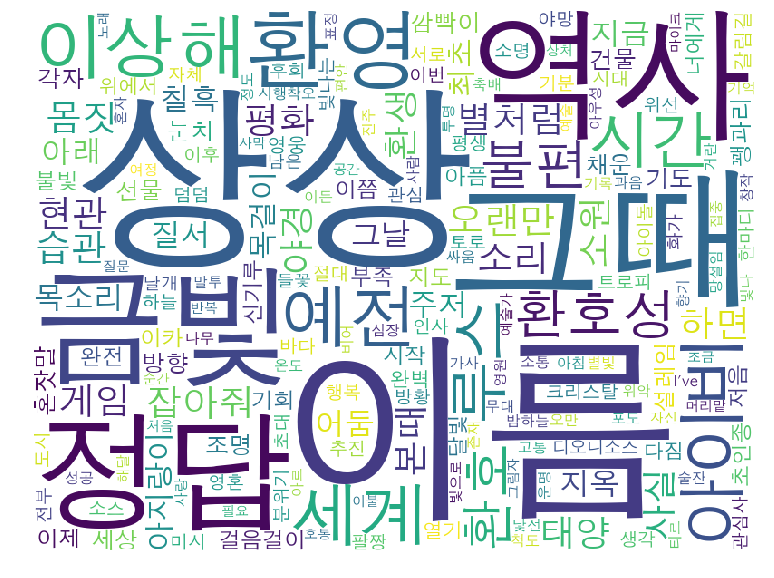

CPU times: user 2.47 s, sys: 235 ms, total: 2.71 s
Wall time: 2.85 s


In [93]:
%time displayWordCloud(' '.join(noun_index))

## 5. 불용어를 업데이트해서 다시 월드클라우드를 그려보세요

## 보너스 

## 6. 네트워크 그래프 그려보기

## 6.1. 공출현 빈도 계산

In [97]:
import numpy as np
occurs = np.zeros([len(tagged_bts_sent), len(unique_nouns)])
np.shape(occurs)

(547, 234)

In [98]:
for i, sent in enumerate(tagged_bts_sent):
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            index = noun_index[word]  # 명사가 있으면, 그 명사의 인덱스를 index에 저정
            occurs[i][index] = 1  # 문장 i의 index 자리에 1을 채워 넣는다.
            
occurs[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [99]:
co_occurs = occurs.T.dot(occurs)

In [100]:
co_occurs[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx #설치 필요 
graph = nx.Graph()

for i in range(len(unique_nouns)):
    for j in range(i + 1, len(unique_nouns)):
        if co_occurs[i][j] > 1.5:
            graph.add_edge(unique_nouns[i], unique_nouns[j])

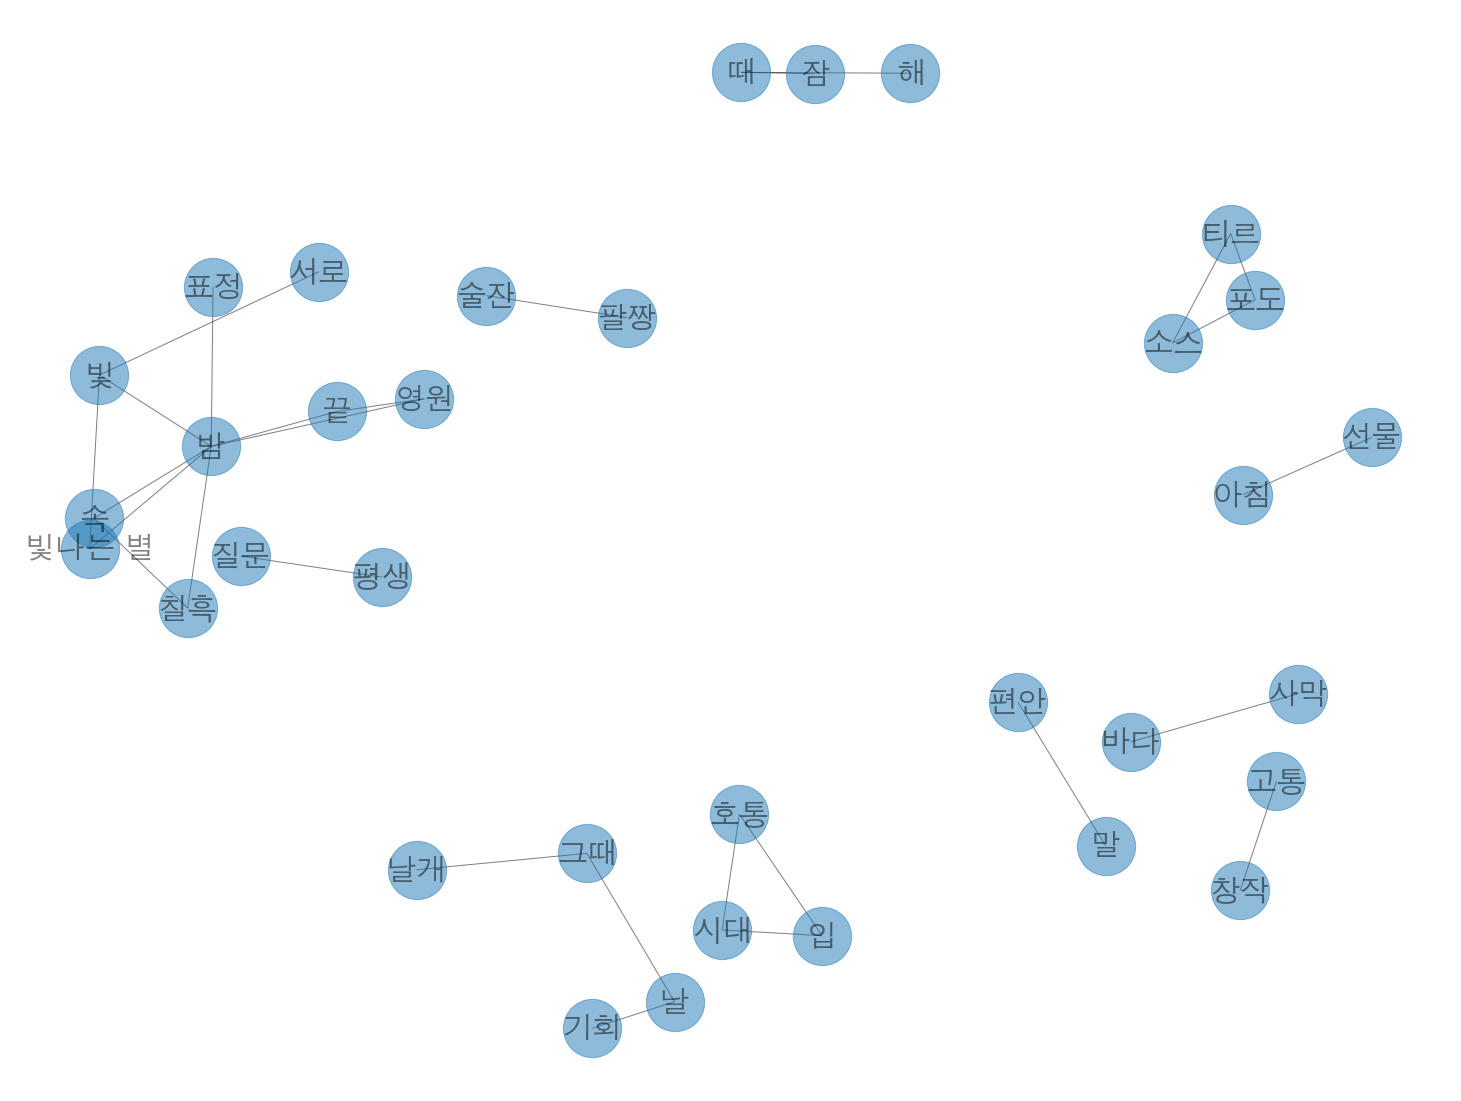

In [103]:
plt.figure(figsize=(20, 15))
layout = nx.spring_layout(graph, k=.5)
nx.draw(graph, pos=layout, with_labels=True,
        font_size=30, font_family="AppleGothic",
        alpha=0.5, node_size=3400)
plt.show()